In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NOTE: modul model jgn diimport di awal

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

# Data understanding

#### 1.Berapa banyak baris dan kolom yang ada pada data

In [3]:
df.shape

(7043, 21)

interpretasi : 
- baris : 7043
- kolom : 21

#### 2.Kolom mana yang disebut sebagai fitur, dan mana yang disebut sebagai label?

In [4]:
print("Fitur(input):")
print(list(df.columns[1:20])) #fitur: kolom 2-20

print("\nLabel(output):") 
print(df.columns[-1]) #label: kolom 21

Fitur(input):
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

Label(output):
Churn


#### 3.Apakah tipe data sudah sesuai dengan deskripsi setiap fitur?

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

NOTE: 
- Tipe data TotalCharges dan SeniorCitizen TIDAK SESUAI
- convert TotalCharges dr str ke num, karena data kategorik tdk memerlukan analisis deskriptif
- convert SeniorCitizen dr num ke str, karena data numerik memerlukan analisis deskriptif

In [6]:
#Ubah data TotalCharges dari str ke numerik
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

NOTE: 
errors='coerce' for convert bad non numeric values to NaN, then check this values by isnull and use boolean indexing

In [7]:
#Ubah data SeniorCitizen dari int ke str
df["SeniorCitizen"] = df["SeniorCitizen"].astype('str')

#Replace SeniorCitizen 0-No (warga usia tak lanjut), 1-Yes (warga usia lanjut)
df["SeniorCitizen"]= df["SeniorCitizen"].replace("0","No")
df["SeniorCitizen"]= df["SeniorCitizen"].replace("1","Yes")

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

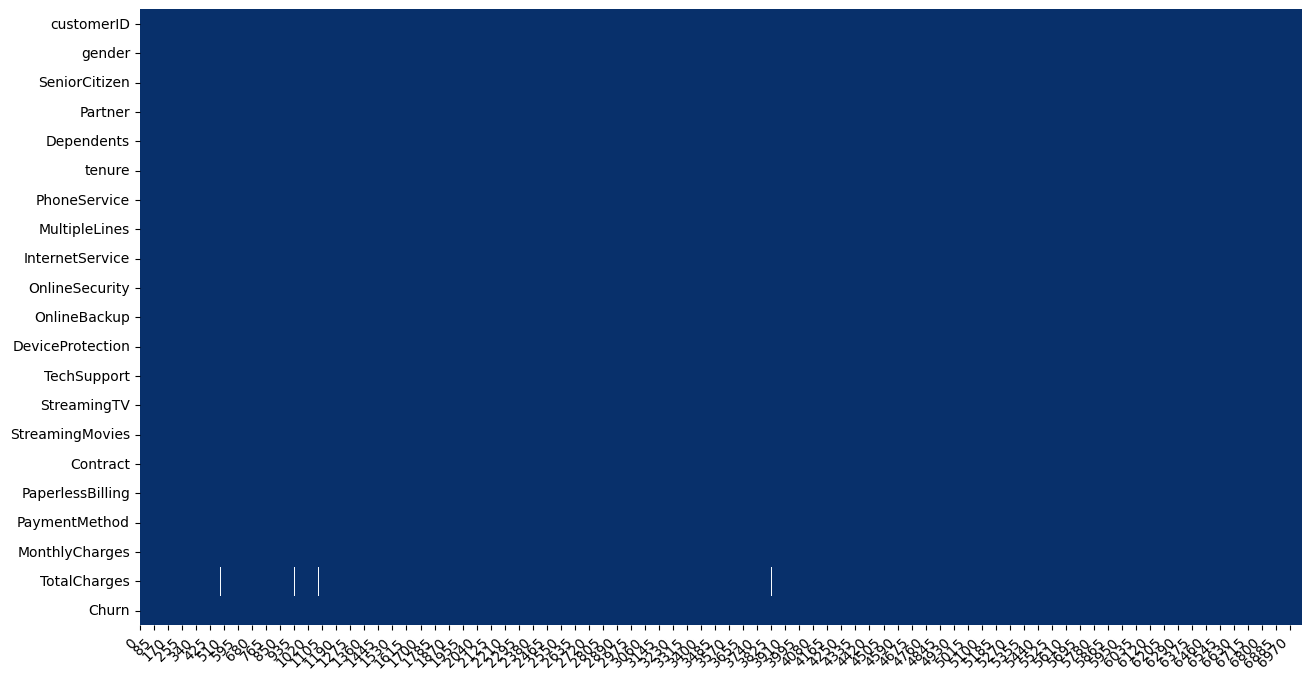

In [9]:
# visualisasi letak data NaN
from jcopml.plot import plot_missing_value
plot_missing_value(df)

In [10]:
# handling missing value (imputasi)
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

KENAPA PAKE MEDIAN?
- keberagaman kecil, dan pola naik angka kecil = pake mean
- keberagaman besar, pola kenaikkan angka besar = pake median

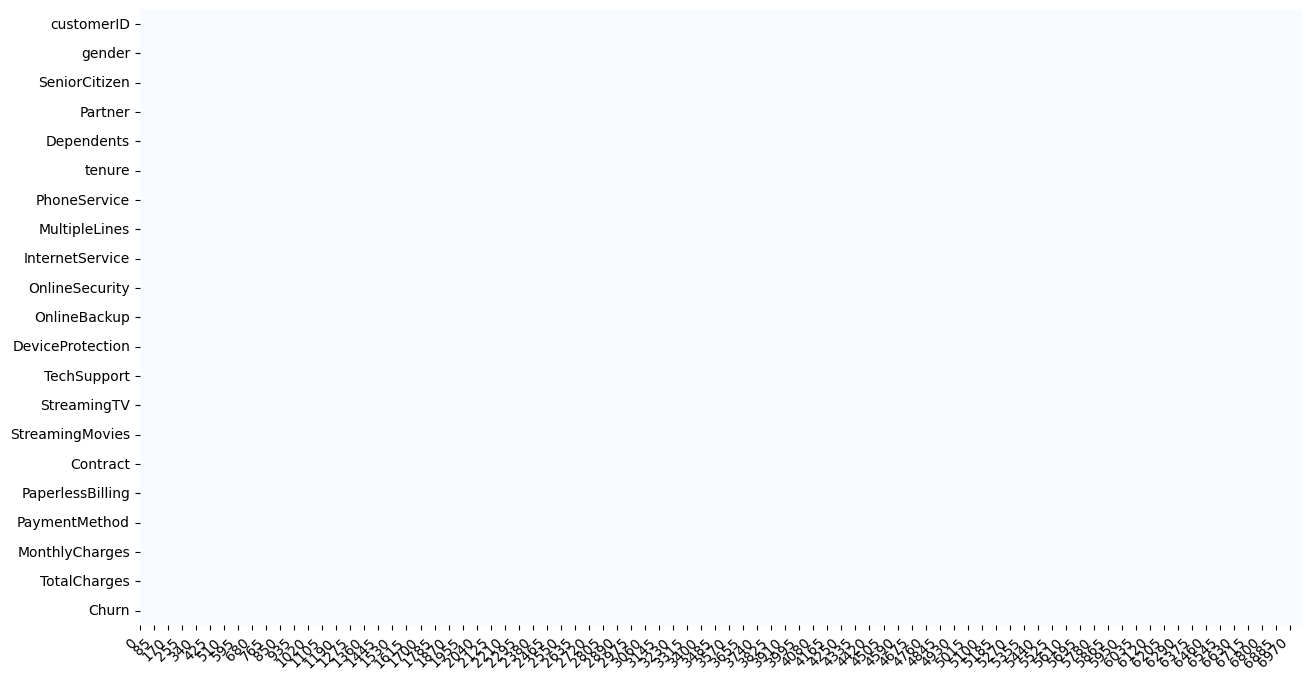

In [11]:
#visualisasi NaN
plot_missing_value(df)

In [12]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
# 4.Explore setiap fitur dengan melihat statistika deskriptif atau value counts nya
df.describe() 

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

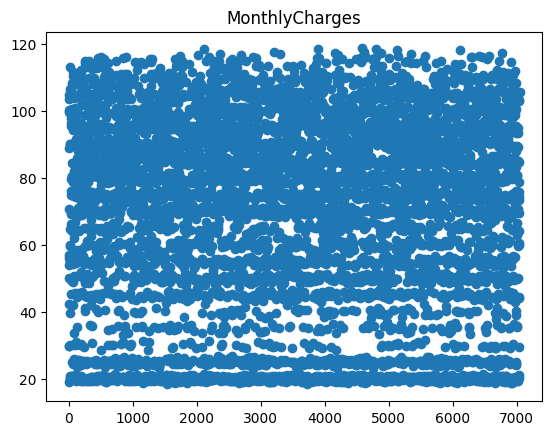

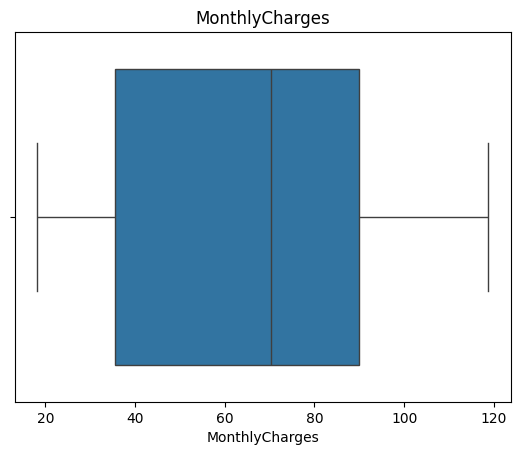

In [14]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.MonthlyCharges.index, df.MonthlyCharges)
plt.title('MonthlyCharges')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.MonthlyCharges)
plt.title('MonthlyCharges')
plt.show()

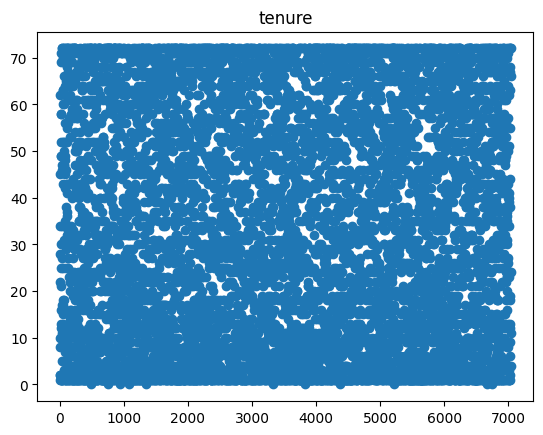

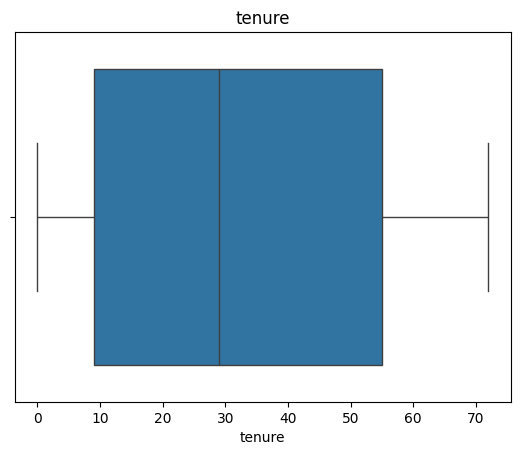

In [15]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.tenure.index, df.tenure)
plt.title('tenure')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.tenure)
plt.title('tenure')
plt.show()

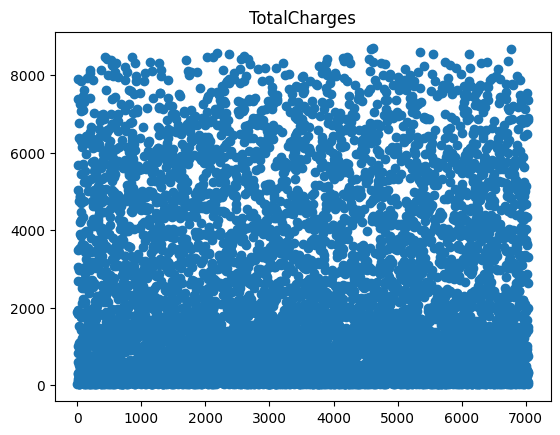

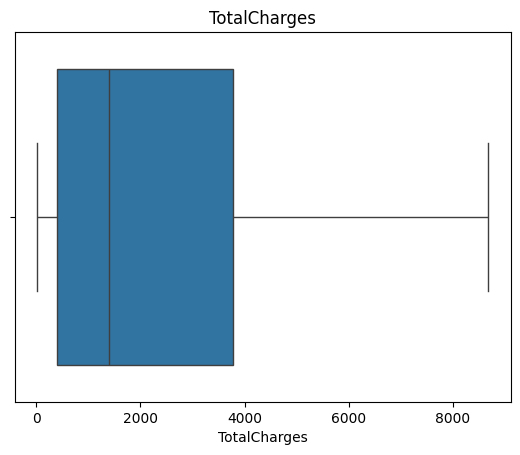

In [16]:
# visualisasi scatter untuk menampilkan data outliers
plt.scatter(df.TotalCharges.index, df.TotalCharges)
plt.title('TotalCharges')
plt.show()

# visualisasi boxplot untuk menampilkan data outliers
sns.boxplot(x=df.TotalCharges)
plt.title('TotalCharges')
plt.show()

In [17]:
#deskripsi / value counts data kategorik
df.describe(exclude = np.number)

customerID gender SeniorCitizen Partner Dependents PhoneService  \
count         7043   7043          7043    7043       7043         7043   
unique        7043      2             2       2          2            2   
top     7590-VHVEG   Male            No      No         No          Yes   
freq             1   3555          5901    3641       4933         6361   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
count           7043            7043           7043         7043   
unique             3               3              3            3   
top               No     Fiber optic             No           No   
freq            3390            3096           3498         3088   

       DeviceProtection TechSupport StreamingTV StreamingMovies  \
count              7043        7043        7043            7043   
unique                3           3           3               3   
top                  No          No          No              No   
freq               3095        3473        2810            2785   

              Contract PaperlessBilling     PaymentMethod Churn  
count             7043             7043              7043  7043  
unique               3                2                 4     2  
top     Month-to-month              Yes  Electronic check    No  
freq              3875             4171              2365  5174

In [18]:
for col in df.select_dtypes(exclude = np.number).columns:
    print(col)
    print(df[col].value_counts())
    print()

customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

SeniorCitizen
SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Onli

#### 5.Apakah ditemukan hal yang menarik atau hal yang janggal pada data?
**Menarik**:
- Tidak ada outlier/pencilan (diliat dr visualisasi outlier)
- Pemodelan Classification lebih cocok dibandingkan pemodelan regresi karena fitur didominasi oleh data katagorik


**kejanggalan** :
- Seniorcitizen : data yg harusnya masuk str tp raw datanya numerik
- TotalCharges : data yang harusnya float tp di raw data str. Saat proses konversi, terdeteksi 11 missing value.
- Distribusi data TotalCharges, tidak normal dibandingkan data numerik lainnya, karena distrubusinya lebih condong ke kiri (nilai minimum).

#### 6.Berapa banyak (bisa dalam %) customer yang churn pada data ini?

In [19]:
total = len(df)
churn = df[df["Churn"] == "Yes"]
total_churn = len(churn)

persentase_churn = total_churn/total*100
print(f"Jumlah customer yang churn: {persentase_churn:.2f}%")

Jumlah customer yang churn: 26.54%


# Data cleaning

#### 1.Apakah ada missing values pada data ini?

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### 2.Jika ada missing values, lakukan imputasi pada data
- setelah converting data totalcharge teridentifikasi ada 11 missing value, dan sudah dilakukan imputasi dengan menggunakan nilai median.
- alasan memakai median karena memiliki ragam dan range data yang besar (bisa dilihat dari nilai std (akar dari ragam), min(0), max(8000), dan jarak angka antar datanya nya yang besar(0 dan ribuaan)). 
- Rata-rata atau mean lebih cocok kalau digunakan pada data yang ragam dan rangenya kecil, juga jarak antar datanya kecil, sehingga missing value bisa lebih terdistribusi di tengah.
- jika memakai mean di data yang ragam dan rangenya besar, akibatnya missing value akan terisi dengan nilai rataan yang bisa saja condong ke nilai max dibandingkan tengah2 data.

#### 3.Apakah ada nilai unknown atau nilai lain yang tidak konsisten?
- Ada nilai unknown (NaN) pada kolom total charges, namun sudah dilakukan imputasi data pada tahap data understanding.
- 
Ada nilai tidak konsisten, yaitu nilai pada kolom senior citizen yang berisi 1/0 yang seharusnya Yes/N seperti data kategorikal yang lainnya. Namun sudah dilakukan Replace data pada tahap data understanding sebelumnya.a

#### 4.Lakukan cleaning jika ada nilai unknown atau nilai yang tidak konsisten
- Ada nilai unknown (NaN) pada kolom total charges, namun sudah dilakukan imputasi data pada tahap data understanding.
- Ada nilai tidak konsisten, yaitu nilai pada kolom senior citizen yang berisi 1/0 yang seharusnya Yes/No seperti data kategorikal yang lainnya. Namun sudah dilakukan Replace data pada tahap data understanding sebelumnya.

#### 5.Apakah ada data yang duplikasi?

In [21]:
print("Jumlah data yang duplikasi: ",df.duplicated().sum())

Jumlah data yang duplikasi:  0


saat dicek duplikasi data, tidak terdapat data yang duplikat, hal ini bisa terjadi karena kolom customerID memiliki count unique sama dengan jumlah row. customerID tidak dibutuhkan dalam pemodelan karena hanya beruba data nomor identitas pelanggan yang tidak ada kaitannya dengan churn. Sehingga customerID harus didrop dulu baru dicek kembali duplikasi datanya.

#### 7.Jika ada yang janggal pada data, dan ingin melakukan drop fitur maupun modifikasi

In [22]:
df.drop(["customerID"],axis=1,inplace=True)

#### 5.Apakah ada data yang duplikasi?

In [23]:
print("Jumlah data yang duplikasi: ",df.duplicated().sum())

Jumlah data yang duplikasi:  22


#### 6.Jika ada data duplikat, bisa dilakukan cleaning juga (hapus data duplikat)

In [24]:
df.drop_duplicates(inplace=True)

#### 8.Setelah melalui tahapan cleaning, ada berapa banyak fitur dan baris yang tersisa?

In [25]:
df.shape

(7021, 20)

# EDA (Exploratory Data Analysis)

#### 1. Lakukan visualisasi setiap fitur yang ditinjau berdasarkan kolom label

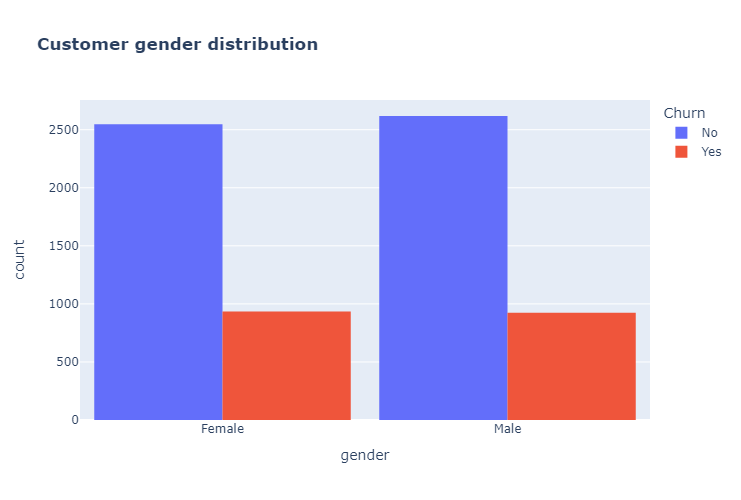

In [26]:
import plotly.express as px
fig = px.histogram(df, x="gender", color="Churn", barmode="group", title="<b>Customer gender distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Interpretasi: 
- potensi MALE menetap di provider (No Churn) lebih besar dibandingkan FEMALE.
- potensi FEMALE berpindah provide (Yes Churn) lebih besar dibandingkan MALE.
- GENDER kemungkinan berpengaruh terhadap Churn dan bisa dipertimbangkan untuk diteliti.

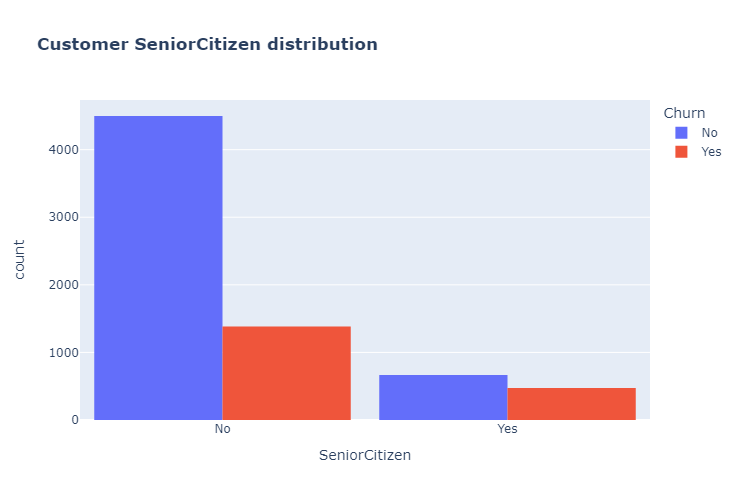

In [27]:
fig = px.histogram(df, x="SeniorCitizen", color="Churn", barmode="group", title="<b>Customer SeniorCitizen distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

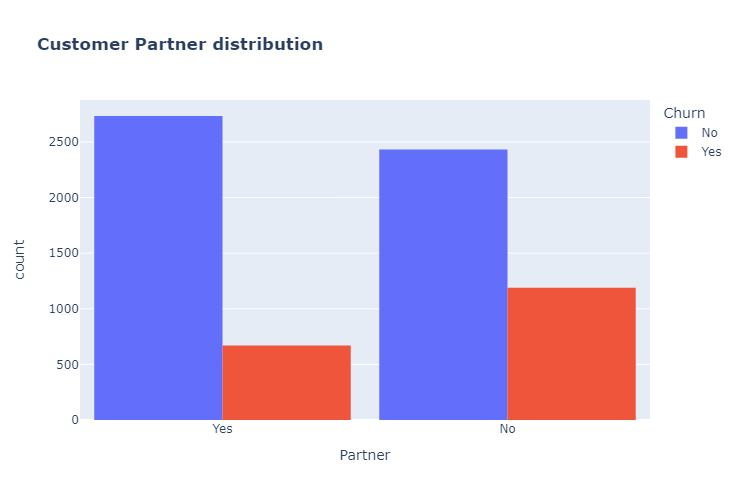

In [28]:
fig = px.histogram(df, x="Partner", color="Churn", barmode="group", title="<b>Customer Partner distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

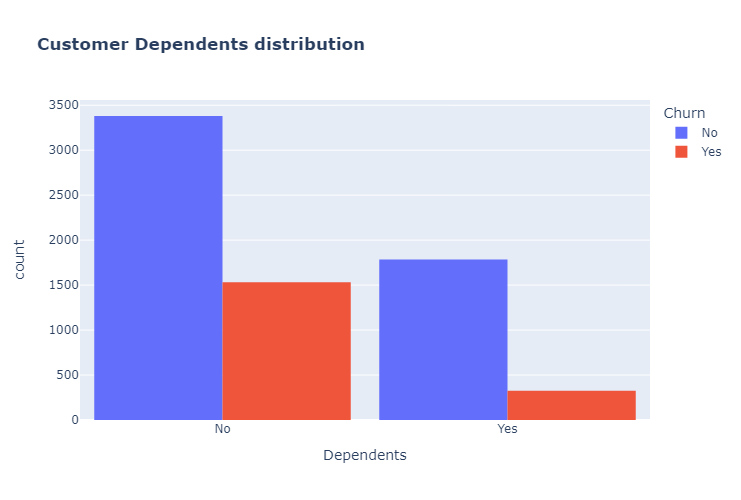

In [29]:
fig = px.histogram(df, x="Dependents", color="Churn", barmode="group", title="<b>Customer Dependents distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

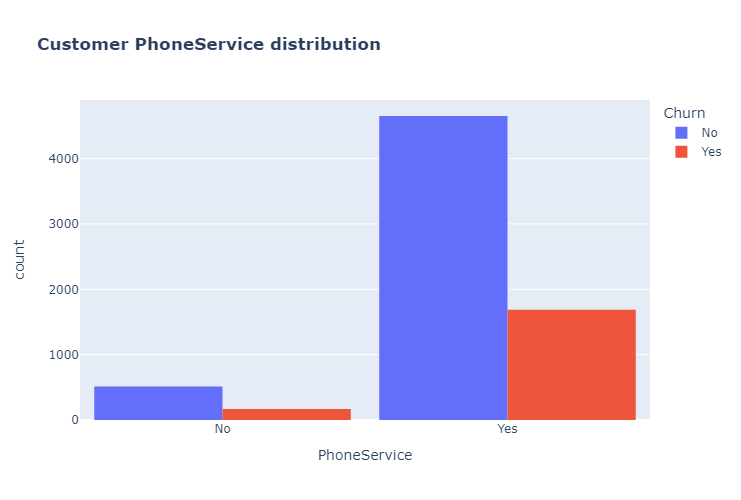

In [30]:
fig = px.histogram(df, x="PhoneService", color="Churn", barmode="group", title="<b>Customer PhoneService distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

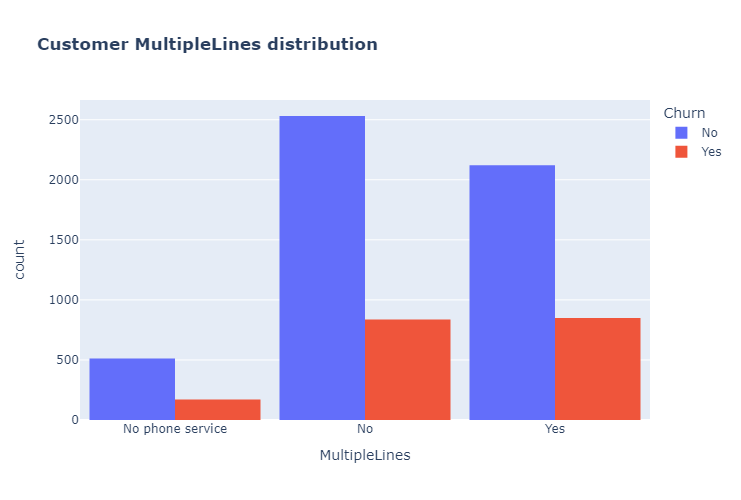

In [31]:
fig = px.histogram(df, x="MultipleLines", color="Churn", barmode="group", title="<b>Customer MultipleLines distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

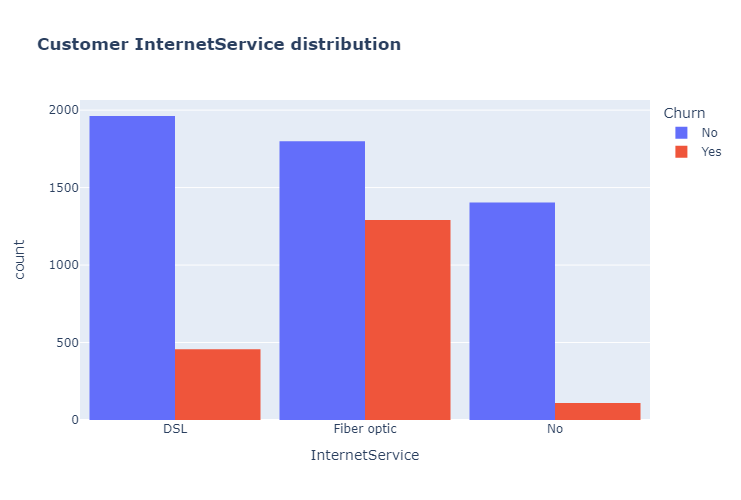

In [32]:
fig = px.histogram(df, x="InternetService", color="Churn", barmode="group", title="<b>Customer InternetService distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

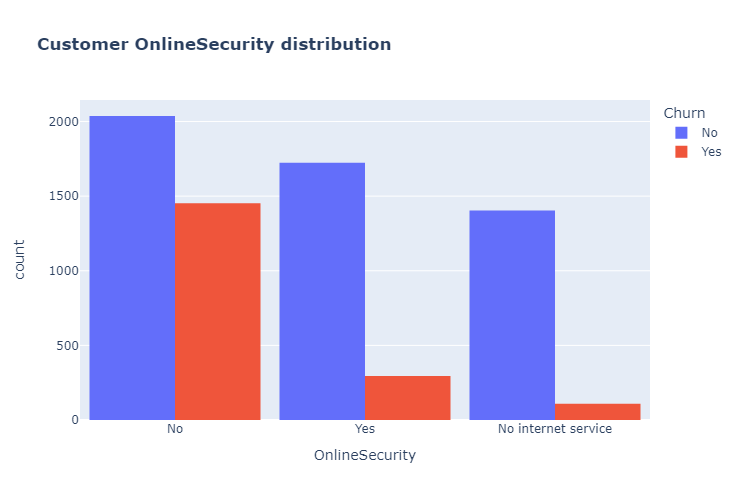

In [33]:
fig = px.histogram(df, x="OnlineSecurity", color="Churn", barmode="group", title="<b>Customer OnlineSecurity distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

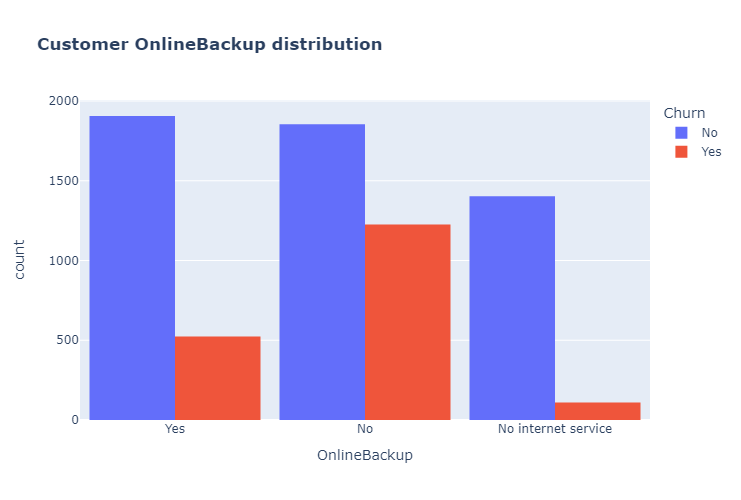

In [34]:
fig = px.histogram(df, x="OnlineBackup", color="Churn", barmode="group", title="<b>Customer OnlineBackup distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

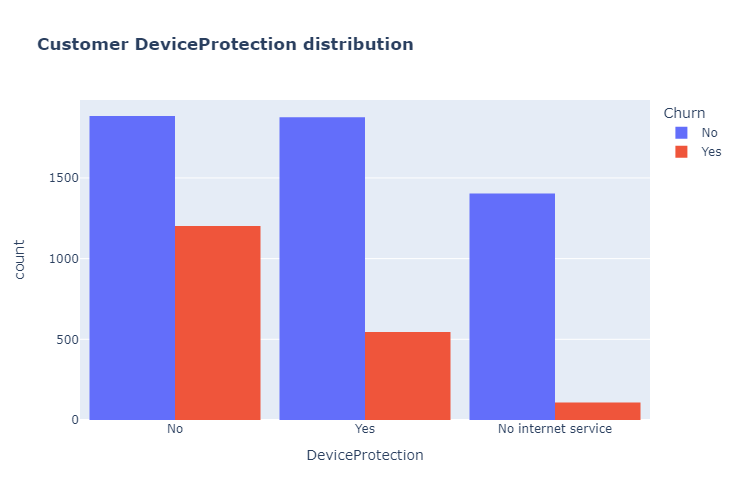

In [35]:
fig = px.histogram(df, x="DeviceProtection", color="Churn", barmode="group", title="<b>Customer DeviceProtection distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

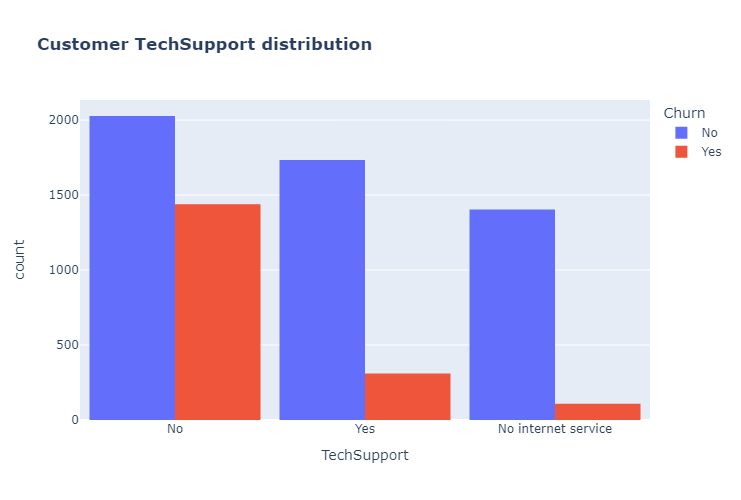

In [36]:
fig = px.histogram(df, x="TechSupport", color="Churn", barmode="group", title="<b>Customer TechSupport distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

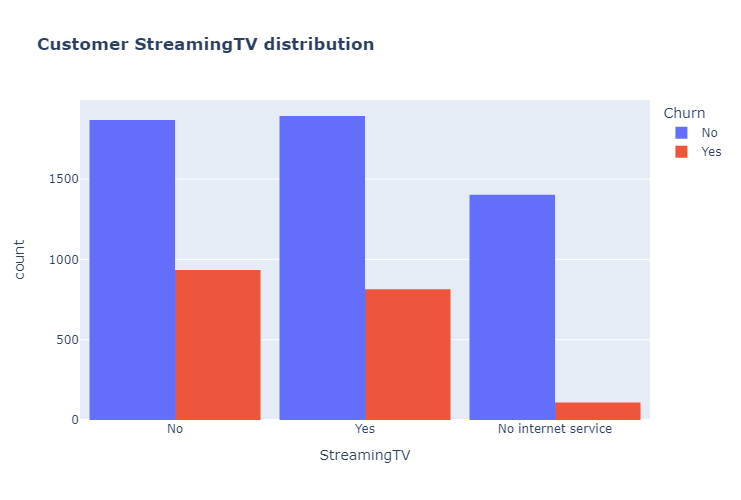

In [37]:
fig = px.histogram(df, x="StreamingTV", color="Churn", barmode="group", title="<b>Customer StreamingTV distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

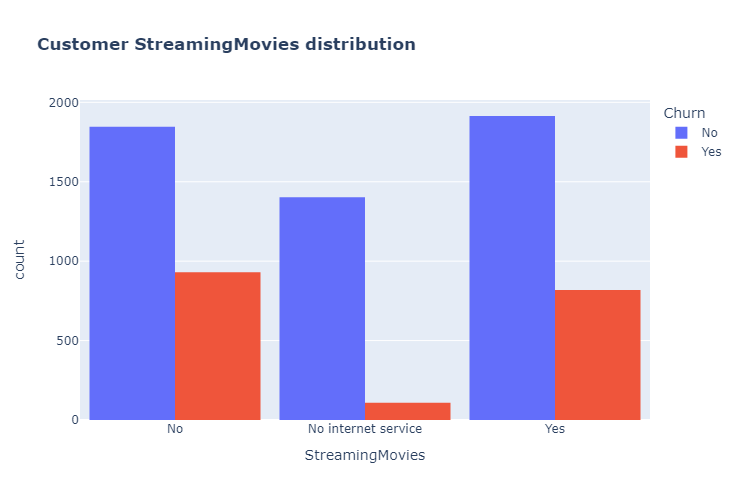

In [38]:
fig = px.histogram(df, x="StreamingMovies", color="Churn", barmode="group", title="<b>Customer StreamingMovies distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

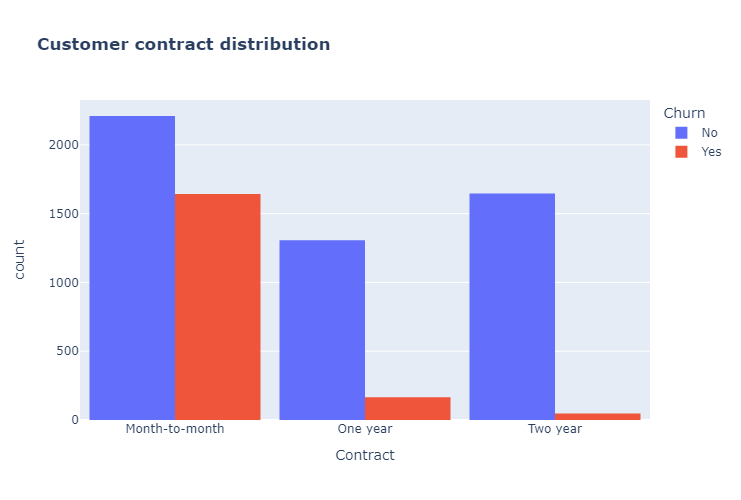

In [39]:
fig = px.histogram(df, x="Contract", color="Churn", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

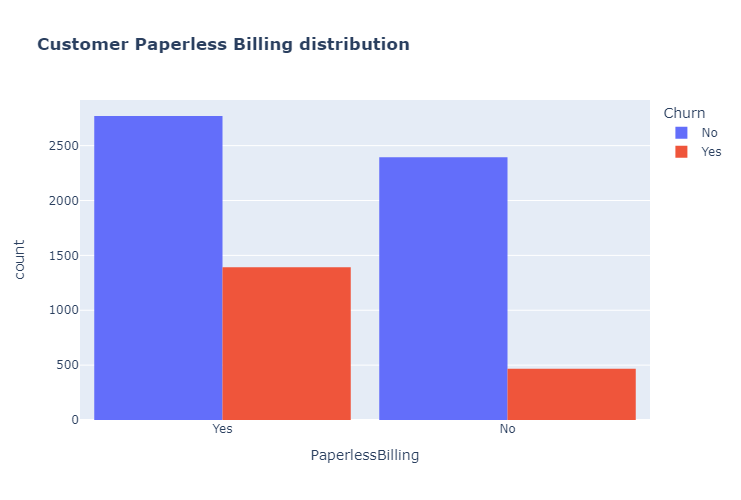

In [40]:
fig = px.histogram(df, x="PaperlessBilling", color="Churn", barmode="group", title="<b>Customer Paperless Billing distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

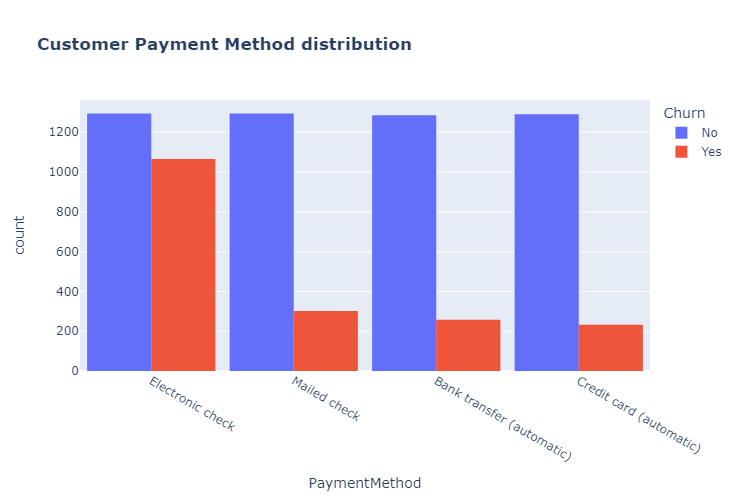

In [41]:
fig = px.histogram(df, x="PaymentMethod", color="Churn", barmode="group", title="<b>Customer Payment Method distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

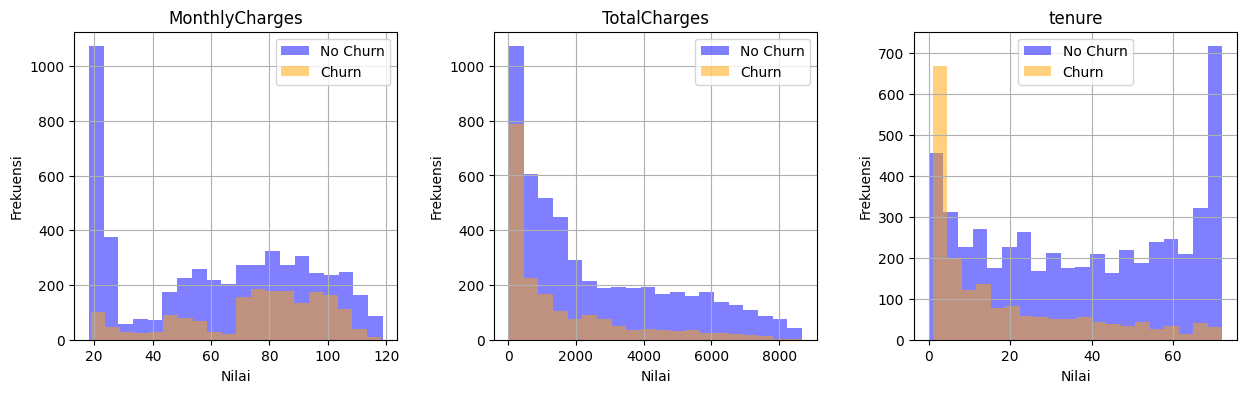

In [42]:
#### Visualisasi Data Numerik

data_numerikal = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

df[df.Churn == 'No'][data_numerikal].hist(bins=20, color='blue', label= 'No Churn', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][data_numerikal].hist(bins=20, color='orange',label= 'Churn', alpha=0.5, ax=ax)
for i, feature in enumerate(data_numerikal):
    ax[i].set_title(feature)
    ax[i].set_xlabel('Nilai')
    ax[i].set_ylabel('Frekuensi')
    ax[i].legend()
plt.show()

### Interpretation 
#### customer’s demographic info
Senior Citizen
no senior citizen has higher potential to churn than senior citizen. Since 83.8% of the data dominated by non senior citizen.

Partner
no partner has higher potential to churn than customer who has partner. Since 51.7% of the data dominated by no partner.

Dependent
no dependent has higher potential to churn than customer who has dependent. Since 70% of the data dominated by non no dependent customer.

#### customer’s services signed up
MultipleLines
no multiple lines has higher potential to churn than customer who has multiple line and customer who has no phone service. Since 48% of the data dominated by no multiple line,  42.2% and 9.7%. by multiple lines customer and no phone service customer.

InternetServie
customer who use fiber optic have higher potential churn than DSL or those who use both. The data dominated 44% by fiber optic. 

OnlineSecurity
Customers who don't have online security have higher potential churn than those who have it. The data dominated 49% by no online security.  

OnlineBackup
Customers who don't have online backup have higher potential churn than those who have it or those who don't have internet service. The data dominated 43.8% by no online backup. 

DeviceProtection
Customers who don't have device protection have higher potential churn than those who have it or those who don't have internet service. The data dominated 43.9% by no device protection. 

TechSupport
Customers who don't have tech support have higher potential churn than those who have it or those who don't have internet service. The data dominated 49% by no tech support.

StreamingTV
Customers who don't have streaming TV have higher potential churn than those who have it or those who don't have internet service. The data dominated 39.9% by no streaming TV.

StreamingMovie
Customers who don't have streaming Movie have higher potential churn than those who have it or those who don't have internet service. The data dominated 39.5% by no streaming Movie.

#### customer’s account info
Tenure
new customer (0 month) has higher potential to churn than old customer.

Contract
Customers who sign MoM contract have higher potential churn than those who have one year or two year contract. The data dominated 55.5% by MoM.

PaperlessBilling
Customers who use paperless billing have higher potential churn than those who don't. The data dominated 59.2% by paperless billing.

PaymentMethod
Customers who use electronic payment have higher potential churn than others. The data dominated 33.6% by electronic.

MonthlyCharge
Customers who pay $70 - $100 per month have higher potential churn than others.

TotalCharge
The lower the total charge, the greater the potential for churn.

#### 2.Berdasarkan hasil perhitungan maupun visualisasi, berapa perbandingan proporsi kategori/kelas pada label(CHURN)? apakah balance atau imbalance

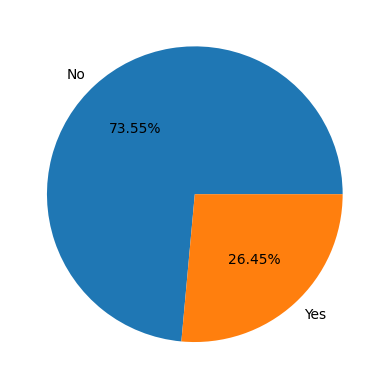

In [43]:
persen = df["Churn"].value_counts()
label = df["Churn"].unique()

plt.pie(persen, labels = label, autopct='%1.2f%%')
plt.show()

berdasarkan pie chart yang menunjukkan proporsi **imbalance**, dimana kategori pelanggan churn lebih kecil yaitu 26,54% dibandingkan yang tidak churn, 73,46%.

#### 3. Adakah yang menarik dari hasil visualisasi per fitur? fitur mana saja yang dirasa signifikan dan kurang signifikan?

####3.1 Fitur Numerikal
*   Signifikan : Tenure dan Monthly Charges
*   Kurang Signifikan : Total Charges

In [44]:
from scipy.stats import chi2_contingency

list_numerical_column = df.select_dtypes(include=['number']).columns.tolist()

for col in list_numerical_column:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    p_value = format(p, '.2f')

    if p < 0.05:
        significance_category = 'Signifikan'
    else:
        significance_category = 'KURANG SIGNIFIKAN'

    print(f'{col}')
    print(f'nilai chi2: {chi2:.2f}')
    print(f'p-value: {p}')
    print(f'p-value convert: {p_value}')
    print(f'Signifikansi: {significance_category}')
    print('\n')

tenure
nilai chi2: 1059.34
p-value: 2.101801031744029e-175
p-value convert: 0.00
Signifikansi: Signifikan


MonthlyCharges
nilai chi2: 2117.00
p-value: 4.400618147326194e-18
p-value convert: 0.00
Signifikansi: Signifikan


TotalCharges
nilai chi2: 6501.70
p-value: 0.5956860267586269
p-value convert: 0.60
Signifikansi: KURANG SIGNIFIKAN




####3.2 Fitur Kategorikal
*   Signifikan : SeniorCitizen, Partner, Dependents, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod
*   Kurang Signifikan : Gender, PhoneService

In [45]:
from scipy.stats import chi2_contingency

list_categorical_column = df.select_dtypes(include=['object']).columns.tolist()

for col in list_categorical_column:
    if col == 'Churn':
      continue
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    p_value = format(p, '.2f')

    if p < 0.05:
        significance_category = 'Signifikan'
    else:
        significance_category = 'KURANG SIGNIFIKAN'

    print(f'{col}')
    print(f'nilai chi2: {chi2:.2f}')
    print(f'p-value: {p}')
    print(f'p-value convert: {p_value}')
    print(f'Signifikansi: {significance_category}')
    print('\n')

gender
nilai chi2: 0.50
p-value: 0.4794615390898278
p-value convert: 0.48
Signifikansi: KURANG SIGNIFIKAN


SeniorCitizen
nilai chi2: 160.47
p-value: 8.934159012714662e-37
p-value convert: 0.00
Signifikansi: Signifikan


Partner
nilai chi2: 155.48
p-value: 1.0999615978939857e-35
p-value convert: 0.00
Signifikansi: Signifikan


Dependents
nilai chi2: 186.79
p-value: 1.5995676694072134e-42
p-value convert: 0.00
Signifikansi: Signifikan


PhoneService
nilai chi2: 0.82
p-value: 0.3664940064978197
p-value convert: 0.37
Signifikansi: KURANG SIGNIFIKAN


MultipleLines
nilai chi2: 12.36
p-value: 0.002068559953130913
p-value convert: 0.00
Signifikansi: Signifikan


InternetService
nilai chi2: 732.06
p-value: 1.0857790034735196e-159
p-value convert: 0.00
Signifikansi: Signifikan


OnlineSecurity
nilai chi2: 846.78
p-value: 1.329226523787891e-184
p-value convert: 0.00
Signifikansi: Signifikan


OnlineBackup
nilai chi2: 598.97
p-value: 8.614898409283196e-131
p-value convert: 0.00
Signifikansi: Sig

# Data preprocessing

#### 1.Berdasarkan EDA yang telah dilakukan, fitur apa saja yang ingin di drop (tidak dipakai) dalam modeling
- selain menggunakan EDA bisa mengecek p-value.
- Berdasarkan EDA yang telah dilakukan, fitur Gender(p-value=0.49), PhoneService(p-value=0.34) dan TotalCharges(p-value=0.58) kurang signifikan dalam menentukan customer churn

In [46]:
#fitur apa saja yang ingin di drop 
df = df.drop(columns=['gender', 'PhoneService', 'TotalCharges'])
df.head()

SeniorCitizen Partner Dependents  tenure     MultipleLines InternetService  \
0            No     Yes         No       1  No phone service             DSL   
1            No      No         No      34                No             DSL   
2            No      No         No       2                No             DSL   
3            No      No         No      45  No phone service             DSL   
4            No      No         No       2                No     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges Churn  
0           29.85    No  
1           56.95    No  
2           53.85   Yes  
3           42.30    No  
4           70.70   Yes

#### 3.Lakukan encoding pada data kategorikal (boleh label encoding atau one hot encoding)

In [47]:
# encoding dengan cat codes
def cat_code(df):
    if df.dtype=='object':
        df = df.astype('category').cat.codes
    return df
df = df.apply(lambda x: cat_code(x))
df.head(5)

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  InternetService  \
0              0        1           0       1              1                0   
1              0        0           0      34              0                0   
2              0        0           0       2              0                0   
3              0        0           0      45              1                0   
4              0        0           0       2              0                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             2                 0            0            0   
1               2             0                 2            0            0   
2               2             2                 0            0            0   
3               2             0                 2            2            0   
4               0             0                 0            0            0   

   StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0                0         0                 1              2           29.85   
1                0         1                 0              3           56.95   
2                0         0                 1              3           53.85   
3                0         1                 0              0           42.30   
4                0         0                 1              2           70.70   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

- kenapa perlu encoding?
untuk data kategorik/string(18), agar bisa diolah dalam ML, perlu dinumerikkan dengan proses encoding.
- kenapa pakai cat codes (categorical codes)?
- 2 tipe encoding :
  1. label encoding(data kategorik yang dipengaruhi urutan/rank ex:tingkat kepuasan (puas, tdk puas, kurang puas))
  2. one hot encoding(data kategorik tidak dipengaruhi rank/urutan). cat codes mirip one hot encode

*   Normalisasi harus dilakukan setelah pembagian data training dan data testing, untuk menghindari data leakage
*   Data leakage (kebocoran data) terjadi ketika informasi / knowledge dari data testing  secara tidak sengaja tercampur dalam data training
*   Data leakage dapat mempengaruhi model dan menyebabkan model tampak lebih baik daripada yang sebenarnya

sumber: https://machinelearningmastery.com/data-leakage-machine-learning/

#### 2.Definisikan input (X) dan output (y) untuk dimasukan ke dalam model

In [48]:
X = df.drop(columns=["Churn"])
y = df["Churn"]
print("x(baris,kolom): ",X.shape)
print("y(baris,kolom): ",y.shape)

x(baris,kolom):  (7021, 16)
y(baris,kolom):  (7021,)


###4. Lakukan normalisasi pada data
* Normalisasi harus dilakukan setelah pembagian data training dan data testing, untuk menghindari data leakage
* Data leakage (kebocoran data) terjadi ketika informasi / knowledge dari data testing  secara tidak sengaja tercampur dalam data training
* Data leakage dapat mempengaruhi model dan menyebabkan model tampak lebih baik daripada yang sebenarnya

sumber: https://machinelearningmastery.com/data-leakage-machine-learning/

#### 5.Bagi data menjadi data train dan test dengan proporsi 80:20

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
print("Jumlah data latih setelah Train-Test-Split:", len(X_train))
print("Jumlah data uji setelah Train-Test-Split:", len(X_test))

Jumlah data latih setelah Train-Test-Split: 5616
Jumlah data uji setelah Train-Test-Split: 1405


In [51]:
###4. Lakukan normalisasi pada data (data numerik)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13032\1775052983.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13032\1775052983.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




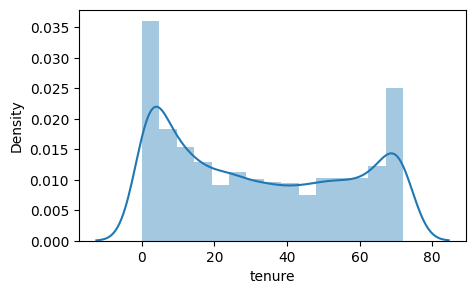

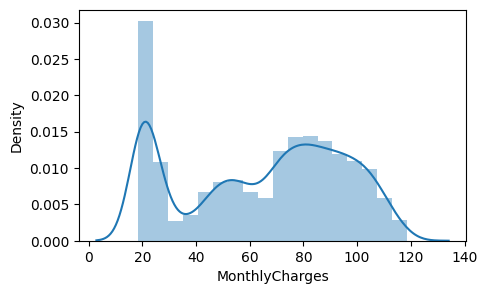

In [52]:
# Distribusi sebelum normalisasi
for column in X[['tenure', 'MonthlyCharges']].columns:
    plt.figure(figsize=(5,3))             
    sns.distplot(X[column])

NOTE: 
- berdasarkan visualisasi distribusi (kolom numerik) sebelum normalisasi:
  1. range data tenure, monthlycharge, dan totalcharge beragam.
  2. normalisasi dilakukan agar data tidak memiliki penyimpangan yang besar. Selain itu, untuk menggunakan skala umum, tanpa merubah/mendistorsi perbedaan rentang nilai (range) dari data.

In [99]:
###4. Lakukan normalisasi pada data

# normalisasi/standarisasi dengan MinMaxScaler untuk mengatasi perbedaan range pada keDUA data numerik
from sklearn.preprocessing import MinMaxScaler
num_cols = ['tenure', 'MonthlyCharges']
mc = MinMaxScaler()
X_train_mc = mc.fit_transform(X_train.astype('float64'))
X_test_mc = mc.fit_transform(X_test.astype('float64'))

In [57]:
print("Training MinMaxScaler :\n", X_train_mc)
print("\nTesting MinMaxScaler :\n", X_test_mc)

Training StandardScaler :
 [[0.         0.         0.         ... 1.         0.66666667 0.60597015]
 [1.         0.         0.         ... 1.         0.33333333 0.65273632]
 [0.         1.         1.         ... 0.         1.         0.02089552]
 ...
 [0.         0.         0.         ... 1.         0.33333333 0.36318408]
 [0.         0.         0.         ... 0.         1.         0.02189055]
 [0.         0.         0.         ... 0.         0.33333333 0.01542289]]

Testing StandardScaler :
 [[0.         1.         1.         ... 1.         0.66666667 0.71571572]
 [0.         1.         1.         ... 1.         0.66666667 0.79329329]
 [1.         0.         0.         ... 1.         0.33333333 0.97497497]
 ...
 [0.         1.         0.         ... 1.         0.33333333 0.42742743]
 [0.         1.         0.         ... 1.         0.33333333 0.46596597]
 [0.         1.         1.         ... 1.         1.         0.01951952]]


NOTE: NORMALISASI dilakukan agar data yang digunakan tidak memiliki penyimpangan yang besar.
- StandardScaler(): untuk data yang punya outlier
- MinMaxScaler(): untuk data tanpa outlier

# Data modeling
Mempertimbangkan sebagian besar fitur dalam dataset adalah data kategorik, kami memutuskan untuk memakai model ML Supervised Classification:
1. Decision Tree Classifier
2. KNeighborsClassifier
3. Random Forest Classifier

## MODEL 1 : Decision Tree Classifier

In [104]:
# MODEL 1 : Decision Tree Classifier
## 1.1 pemodelan 1
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_mc,y_train)

## menerapkan model untuk prediksi
y_pred = model.predict(X_test_mc)

# MODEL 2: K Neighbors Classifier (KNN)
## 2.1 pemodelan 2
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
model2.fit(X_train_mc, y_train)

## prediksi ountput
y_pred2 = model2.predict(X_test_mc)

# Model 3:  Random Forest Classifier
# 3.1.pemodelan 3
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train_mc, y_train)

# prediksi ountput
y_pred3 = model3.predict(X_test_mc)

In [111]:
# MODEL 1 : Decision Tree Classifier
## 1.2.Lakukan validasi berdasarkan hasil kfold. apakah hasil setiap fold nya konsisten?
### Evaluasi dengan K-Fold Cross Validation
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)


### Tampilkan hasil validasi
print(f"Akurasi DTC Setiap Fold: {results}")
print(f"Rataan Akurasi DTC K-Fold: {results.mean():.4f})")

# MODEL 2: K Neighbors Classifier (KNN)
## 2.2 Lakukan validasi berdasarkan hasil kfold. apakah hasil setiap fold nya konsisten?
### Evaluasi dengan K-Fold Cross Validation
kfold2 = KFold(n_splits=5, shuffle=True, random_state=42)
results2 = cross_val_score(model2, X, y, cv=kfold2)

#### Tampilkan hasil validasi
print(f"\nAkurasi KNN Setiap Fold: {results2}")
print(f"Rataan Akurasi KNN K-Fold: {results2.mean():.4f})")

# Model 3:  Random Forest Classifier
## 3.2 Lakukan validasi berdasarkan hasil kfold. apakah hasil setiap fold nya konsisten?
### Evaluasi dengan K-Fold Cross Validation
kfold3 = KFold(n_splits=5, shuffle=True, random_state=42)
results3 = cross_val_score(model3, X, y, cv=kfold3)

### Tampilkan hasil validasi
print(f"\nAkurasi RFC Setiap Fold: {results3}")
print(f"Rataan Akurasi RFC K-Fold: {results3.mean():.4f})")

Akurasi DTC Setiap Fold: [0.71103203 0.73361823 0.72079772 0.73076923 0.752849  ]
Rataan Akurasi DTC K-Fold: 0.7298)

Akurasi KNN Setiap Fold: [0.76939502 0.77706553 0.76424501 0.76851852 0.76994302]
Rataan Akurasi KNN K-Fold: 0.7698)

Akurasi KNN Setiap Fold: [0.78362989 0.78133903 0.78347578 0.7977208  0.79487179]
Rataan Akurasi RFC K-Fold: 0.7882)


NOTE: JADI KFOLD PAKAI X YANG BLM DINORMALISASI?

In [110]:
# 1.3 Berdasarkan confusion matrix, berapa precision dan recall yang dihasilkan model tersebut?
# Evaluasi dengan confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_pred)

dtc_precision = precision_score(y_test,y_pred)
dtc_recall = recall_score(y_test,y_pred)
dtc_accuracy = accuracy_score(y_test,y_pred)

print("Decision Tree Clasifier:")
print(cm)
print(classification_report(y_test,y_pred))
print(f"Presisi CM DTC : {(dtc_precision * 100):.2f}")
print(f"Recall CM DTC : {(dtc_recall * 100):.2f}")
print(f"Akurasi CM DTC : {(dtc_accuracy * 100):.2f}")

# 2.3 Berdasarkan confusion matrix, berapa precision dan recall yang dihasilkan model tersebut?
# pemodelan 1
from sklearn.metrics import precision_score, recall_score,classification_report, confusion_matrix
cm2 = confusion_matrix(y_test, y_pred2)

knn_precision = precision_score(y_test,y_pred2)
knn_recall = recall_score(y_test,y_pred2)
knn_accuracy = accuracy_score(y_test,y_pred2)

print("\nK-Nearest Neigbors:")
print(cm2)                              
print(classification_report(y_test,y_pred2))
print(f"Presisi CM KNN : {(knn_precision * 100):.2f}")
print(f"Recall CM KNN : {(knn_recall * 100):.2f}")
print(f"Akurasi CM KNN : {(knn_accuracy * 100):.2f}")

# 3.3.Berdasarkan confusion matrix, berapa precision dan recall yang dihasilkan model tersebut?
cm3 = confusion_matrix(y_test, y_pred3)

rfc_precision = precision_score(y_test,y_pred3)
rfc_recall = recall_score(y_test,y_pred3)
rfc_accuracy = accuracy_score(y_test,y_pred3)

print("\nRandom Forest Clasifier:")
print(cm3)
print(classification_report(y_test,y_pred3))
print(f"Presisi CM RFC : {(rfc_precision * 100):.2f}")
print(f"Recall CM RFC : {(rfc_recall * 100):.2f}")
print(f"Akurasi CM RFC : {(rfc_accuracy * 100):.2f}")

Decision Tree Clasifier:
[[816 237]
 [181 171]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1053
           1       0.42      0.49      0.45       352

    accuracy                           0.70      1405
   macro avg       0.62      0.63      0.62      1405
weighted avg       0.72      0.70      0.71      1405

Presisi CM DTC : 41.91
Recall CM DTC : 48.58
Akurasi CM DTC : 70.25

K-Nearest Neigbors:
[[889 164]
 [177 175]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1053
           1       0.52      0.50      0.51       352

    accuracy                           0.76      1405
   macro avg       0.68      0.67      0.67      1405
weighted avg       0.75      0.76      0.76      1405

Presisi CM KNN : 51.62
Recall CM KNN : 49.72
Akurasi CM KNN : 75.73

Random Forest Clasifier:
[[925 128]
 [189 163]]
              precision    recall  f1-score   support

           0  

## Decision Tree Clasifier
- **Hasil validasi kfold pada model DTC menunjukkan bahwa di kelima foldnya konsisten, dengan rata-rata akurasi 72.98%**
#### hasil confusion matrix:
- **Akurasi : 70.25% customer yang benar diprediksi churn maupun tidak churn dari keseluruhan customer**
- **Presisi : Terdapat 41.91% customer yang benar Churn dari yang diprediksi Churn, sisanya 58.09% yang benar churn, tidak bisa ditangkap oleh model**
- **Recall : model DTC berhasil menangkap 48.58% customer yang sebenarnya melakukan churn**

## K-Nearest Neigbors
- **Hasil validasi kfold pada model KNN menunjukkan bahwa di kelima foldnya konsisten, dengan rata-rata akurasi 76.98%**
#### hasil confusion matrix:
- **Akurasi : 75.73% customer yang benar diprediksi churn maupun tidak churn dari keseluruhan customer**
- **Presisi : Terdapat 51.62% customer yang benar Churn dari yang diprediksi Churn. Sedangkan sisanya 48.38% yang benar churn, namun tidak bisa ditangkap oleh model**
- **Recall : model KNN berhasil menangkap 49.72% customer yang sebenarnya melakukan churn**

## Random Forest Clasifier
- **Hasil validasi kfold pada model RFC menunjukkan bahwa di kelima foldnya konsisten, dengan rata-rata akurasi 78.82%**
#### hasil confusion matrix:
- **Akurasi : 77.44% customer yang benar diprediksi churn maupun tidak churn dari keseluruhan customer**
- **Presisi : Terdapat 56.01% customer yang benar Churn dari yang diprediksi Churn. Sedangkan sisanya 45.82% yang benar churn, namun tidak bisa ditangkap oleh model**
- **Recall : model RFC berhasil menangkap 46.31% customer yang sebenarnya melakukan churn**

note :
presisi = kecocokan antara bagian data yang diambil dengan informasi yang dibutuhkan.
recall = tingkat keberhasilan sistem dalam menemukan kembali sebuah informasi.

## 4.Model manakah yang dirasa lebih baik untuk memodelkan data ini?
Dari 3 pemodelan (DecisionTree Classifier, KNeighborsClassifier, dan Random Forest Classifier), hasil pengujian menunjukkan bahwa pemrosesan data menggunakan algoritma **Random Forest Clasifier** memiliki akurasi pemodelan tertinggi yaitu 77.44% (dengan confusion matrix) atau 78.82% (dengan kfold).

# Interpretasi bisnis

#### 1.Bagaimana hasil model dapat diinterpretasikan ke permasalahan nyata?
Berdasarkan hasil model ML terbaik (Random Forest Clasifier).
- Precision (56.01%) cukup untuk menunjukkan bahwa model memiliki kemampuan yang baik dalam menghindari membuat prediksi positif palsu (Customer yang sebenarnya tidak melakukan churn).
- Recall (46.31%) menunjukkan bahwa model memiliki kemampuan yang kurang baik dalam mengidentifikasi customer yang berpotensi untuk mengganti provider(churn).

#### 2.Faktor apa saja yang mempengaruhi customer churn?

In [72]:
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
PaymentMethod       0.106238
MultipleLines       0.040175
PhoneService        0.011323
gender             -0.008763
StreamingTV        -0.034591
StreamingMovies    -0.036492
InternetService    -0.047366
Partner            -0.149135
SeniorCitizen      -0.151619
Dependents         -0.163459
DeviceProtection   -0.176770
OnlineBackup       -0.194214
TotalCharges       -0.197911
TechSupport        -0.281654
OnlineSecurity     -0.288505
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

Semua faktor memenagruhi churn, namun :
- Faktor yang paling besar berpengaruh terhadap churn: Contract
- Faktor yangpaling kecilgberpengaruh terhadapi churn Gender

NOTE: 
nilai korelasi semakin mendekati 0 = korelasi semakin lemah, mendekati 1 = korelasi semakin kuat.


#### 3.Apa suggestion yang bisa diberikan kepada perusahaan telco, berdasarkan model yang dihasilkan?
Churn (perpindahan customer) menjadi ancaman karena berpotensi menurunkan profitabilitas perusahaan. Saran yang dapat kami berikan adalah perusahaan lebih mengenal customer dan berusaha meningkatkan kepuasan mereka. 

Berdasarkan hasil identifikasi kami, beberapa variabel yang perlu menjadi fokus perusahaan sebagai berikut:
1. **variabel Contract** (jangka waktu kontrak konsumen) yang paling besar mempengaruhi churn. perusahaan dapat mengevaluasi dan memperbarui strategi kontrak mereka untuk membuatnya lebih menarik dan berkelanjutan. Dari kontrak yang sudah ada yaitu “Bulan-ke-bulan”, “Satu tahun”, dan “Dua tahun”, perusahaan dapat menambah variasi jangka waktu kontrak misalnya per triwulan.
2. **Variabel Tenure** (berapa bulan konsumen telah berlangganan di perusahaan). Perusahaan harus bisa menjaga customer untuk berlangganan dalam jangka waktu yang lama dengan melakukan peningkatan layanan. Terkhusus bagi customer yang berlangganan baru yang potensi churnnya lebih besar, perusahaan bisa memberikan custemer baru penawaran khusus atau diskon.
